# Data visualization (SEABORN)


Seaborn Python is a data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Because seaborn python is built on top of Matplotlib, the graphics can be further tweaked using Matplotlib tools and rendered with any of the Matplotlib backends to generate publication-quality figures.

Types of plots that can be created using seaborn python include:

1. Distribution plots
2. Regression plots
3. Categorical plots
4. Matrix plots  
5. Time series plots

In [1]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
# customize seaborn theme or use one of six variations of the default theme
sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

#### the definition of the displayed plot is a bit better: retina quality. Any display with retina resolution will make the figures look better - if your monitor's resolution is sub-retina than the improvement will be less noticeable.

In [2]:
df = pd.read_csv("/Users/fahmidaliza/Desktop/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Univariate visualization

analyze a feature independently in the distribution of its values and ignore other features in the dataset.

<b> 2.1 Quantitative features

Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

######  Histograms and density plots

<font color='blue'> A histogram is an approximate representation of the distribution of numerical data. It was first introduced by Karl Pearson.
density estimation is the construction of an estimate, based on observed data, of an unobservable underlying probability density function. The unobservable density function is thought of as the density according to which a large population is distributed; the data are usually thought of as a random sample from that population.</font> 

<font color='red'>A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. Some authors recommend that bar charts have gaps between the rectangles to clarify the distinction.A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis. </font>

####### The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame's method hist().

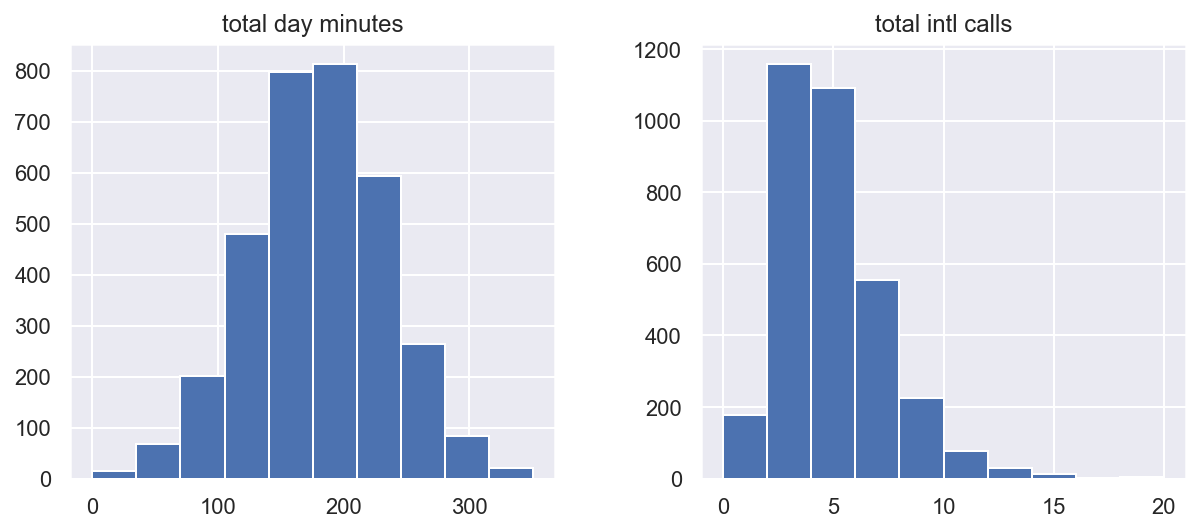

In [3]:
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(10, 4));

The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

#### There is also another, often clearer, way to grasp the distribution: density plots or, more formally, Kernel Density Plots

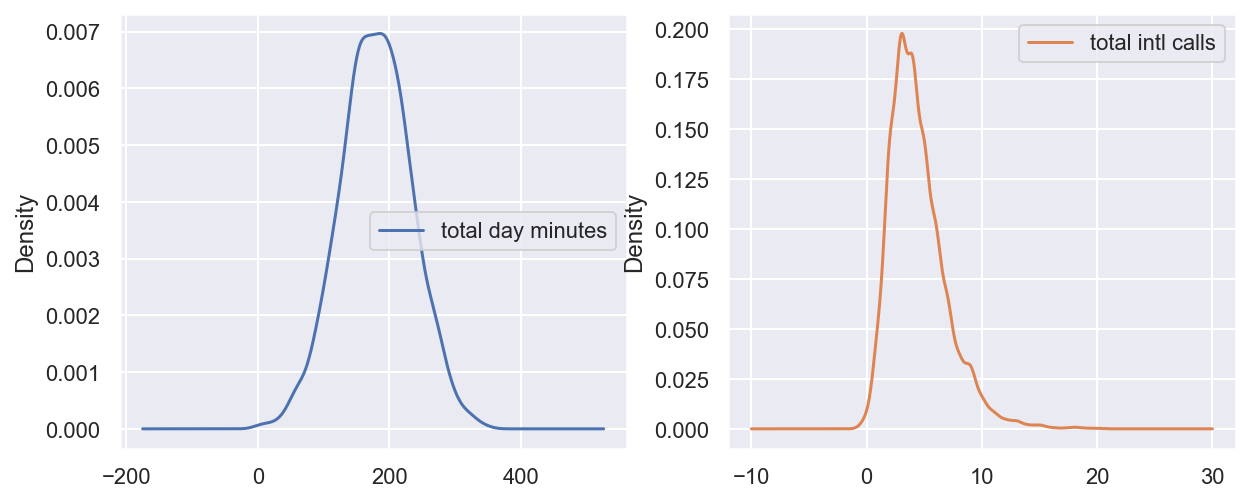

In [4]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

#### As known as Kernel Density Plots, Density Trace Graph.

A Density Plot visualises the distribution of data over a continuous interval or time period.

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. In some fields such as signal processing and econometrics it is also termed the Parzen–Rosenblatt window method, after Emanuel Parzen and Murray Rosenblatt, who are usually credited with independently creating it in its current form.[

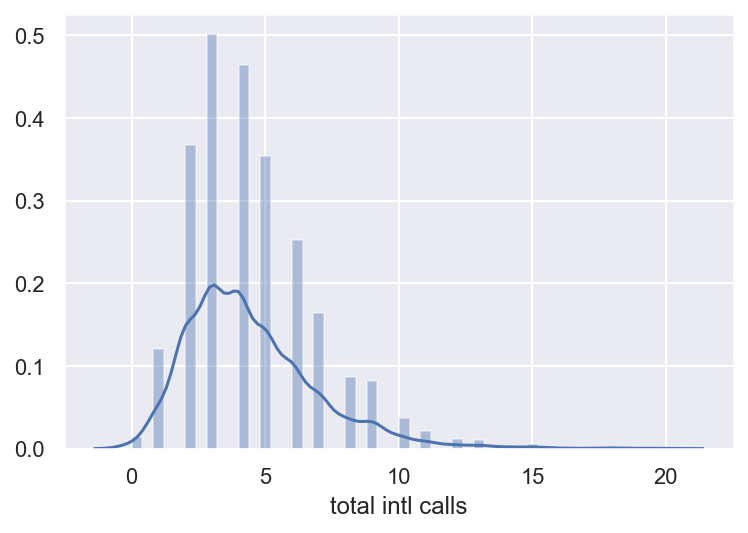

In [5]:
sns.distplot(df['total intl calls']);

## Boxplot

<b> In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution 

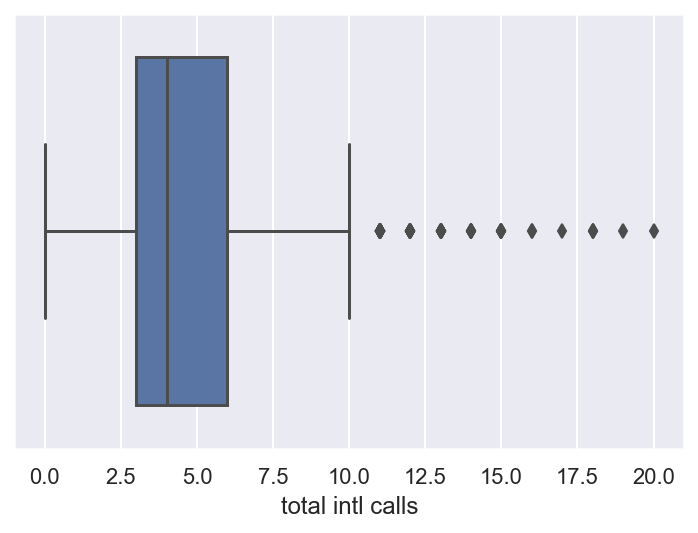

In [6]:
sns.boxplot(x='total intl calls', data=df);

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25𝑡ℎ(Q1) and  75𝑡ℎ(Q3) percentiles.he vertical line inside the box marks the median 50% of the distribution.
The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval (Q1−1.5⋅IQR,Q3+1.5⋅IQR) where  IQR=Q3−Q1 is the interquartile range.

# Violin plot

<b>A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side</b>

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.
Violin plots are available as extensions to a number of software packages such as DataVisualization on CRAN [3] and the md-plot package on PyPI.[4]

A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). In this case a violin plot shows the presence of different peaks, their position and relative amplitude.

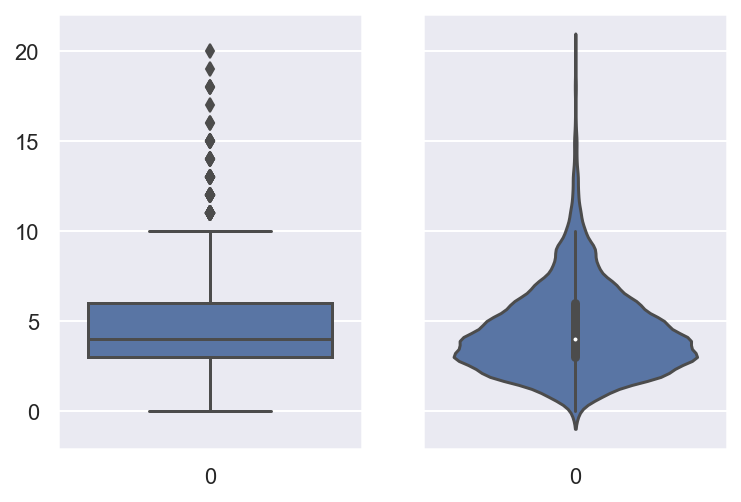

In [7]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['total intl calls'], ax=axes[0]);
sns.violinplot(data=df['total intl calls'], ax=axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.
In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

###### describe()

In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method describe() of a DataFrame:

In [8]:
df[features].describe()

,total day minutes,total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


##### Categorical and binary features

<font color='blue'>Categorical features can only take on a limited, and usually fixed, number of possible values.Categorical Data is the data that generally takes a limited number of possible values. Also, the data in the category need not be numerical, it can be textual in nature. All machine learning models are some kind of mathematical model that need numbers to work with. This is one of the primary reasons we need to pre-process the categorical data before we can feed it to machine learning models</font>

###### Frequency table

The value_counts() function is used to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element.

In [9]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

##### Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the seaborn's function countplot(). There is another function in seaborn that is somewhat confusingly called barplot() and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.


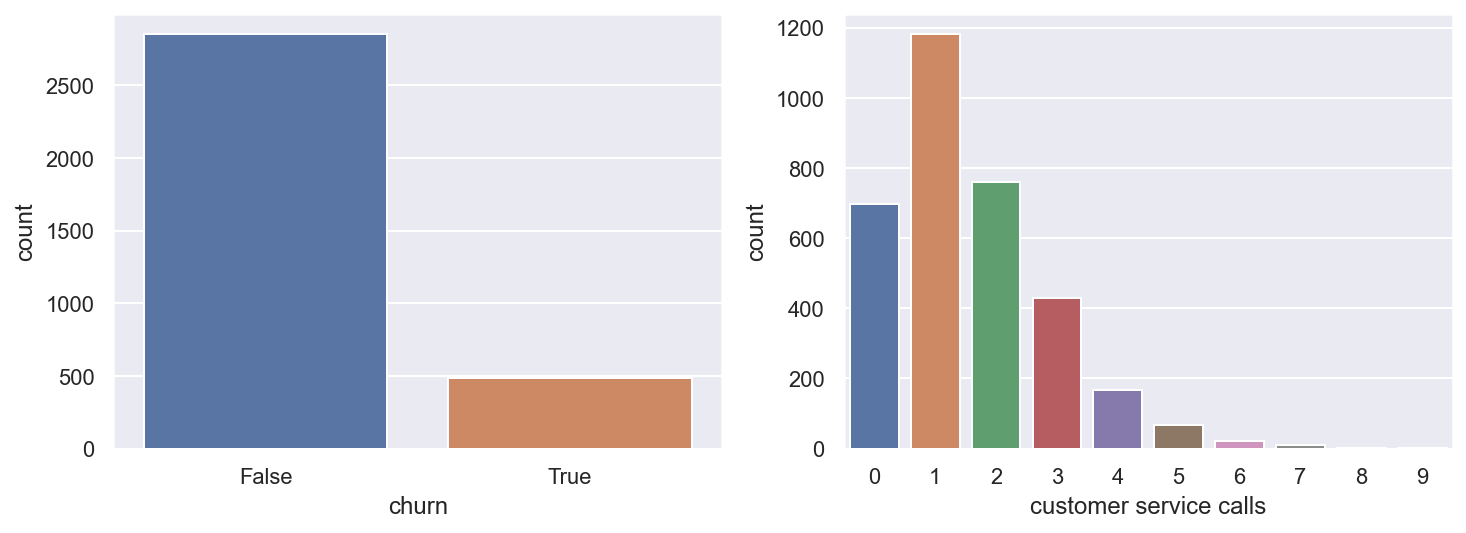

In [10]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='churn', data=df, ax=axes[0]);
sns.countplot(x='customer service calls', data=df, ax=axes[1]);

#### Difference histogram vs bar plot

1. Histogram refers to a graphical representation, that displays data by way of bars to show the frequency of numerical data.Bar graph is a pictorial representation of data that uses bars to compare different categories of data.

2. Distribution of non-discrete variables.Comparison of discrete variables

3. Bars touch each other, hence there are no spaces between bars.Bars do not touch each other, hence there are spaces between bars.

4. Elements are grouped together, so that they are considered as ranges.	Elements are taken as individual entities.

### Multivariate visualization

Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

##### correlation matrix:
It is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values:

## What is a heatmap?

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator’s requirement.

## Create the Heatmap

In the final step, we create the heatmap using the heatmap function from the seaborn python package. The heatmap function takes the following arguments:

- data – 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

- annot – an array of same shape as data which is used to annotate the heatmap.

- cmap – a matplotlib colormap name or object. This maps the data values to the color space.

- fmt – string formatting code to use when adding annotations.

- linewidths – sets the width of the lines that will divide each cell.

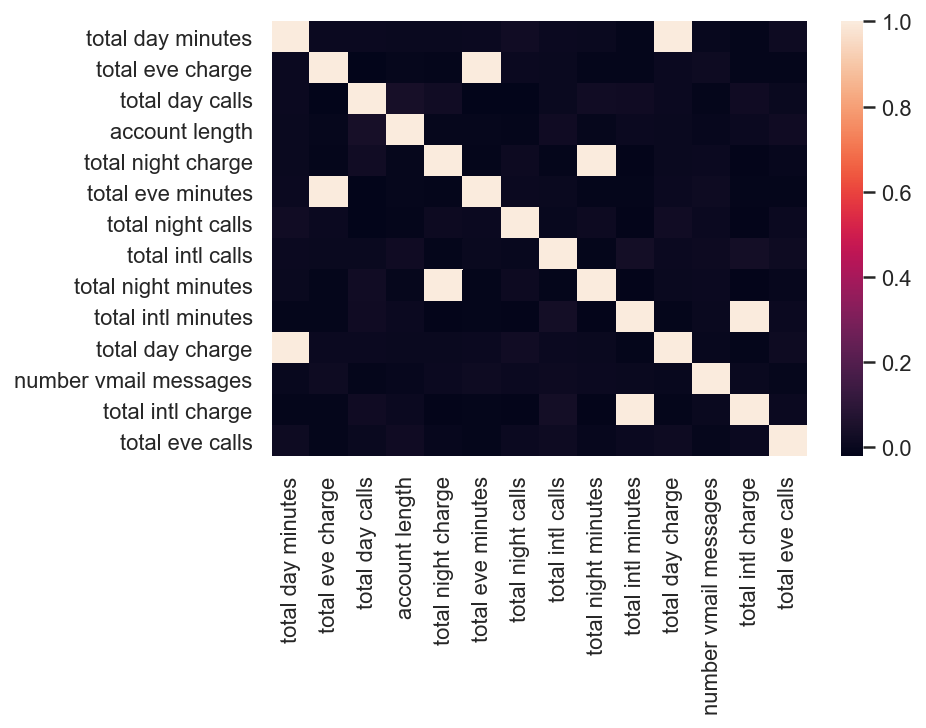

In [11]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['state', 'international plan', 'voice mail plan', 
                      'area code', 'churn', 'customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

These are called <b>dependent variables</b> and can therefore be left out since they do not contribute any additional information.

In [12]:
numerical = list(set(numerical) - 
                 set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))

## Scatter plot
A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data

## Grouping variables in Seaborn Scatter Plot

The <b>hue</b> parameter can be used to group the multiple data variables and show dependency between them in terms of different colors of the markers used to plot the data values.

Using <b>style</b> as a parameter, we can depict the relationship between multiple data variables and their dependency using different types of scatter icons used to depict the data values.

The <b>size</b> parameter produces the plot in such a manner that the dependency and relationship between the multiple plots is depicted using scatter patterns of different sizes.

The inclusion of <b>palette</b> parameter helps us represent the data with different Seaborn colormap values.

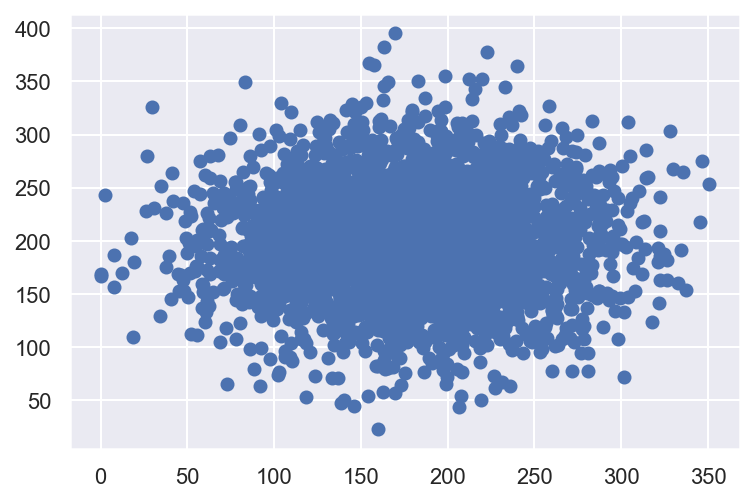

In [13]:
plt.scatter(df['total day minutes'], df['total night minutes']);

### jointplot
Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.

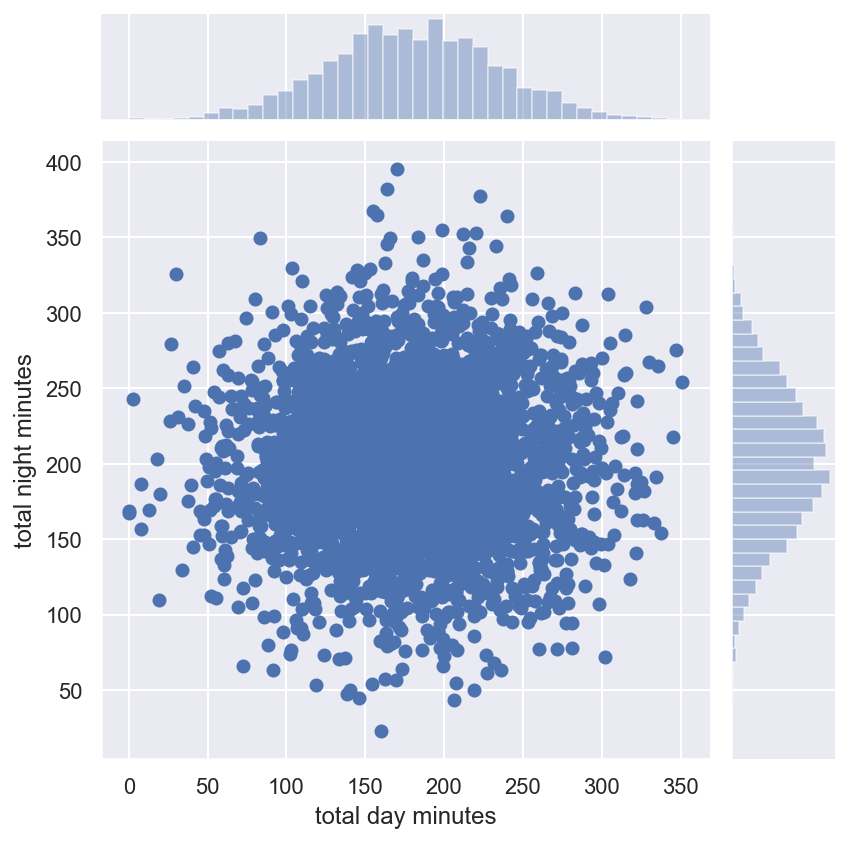

In [14]:
sns.jointplot(x='total day minutes', y='total night minutes', 
              data=df, kind='scatter');

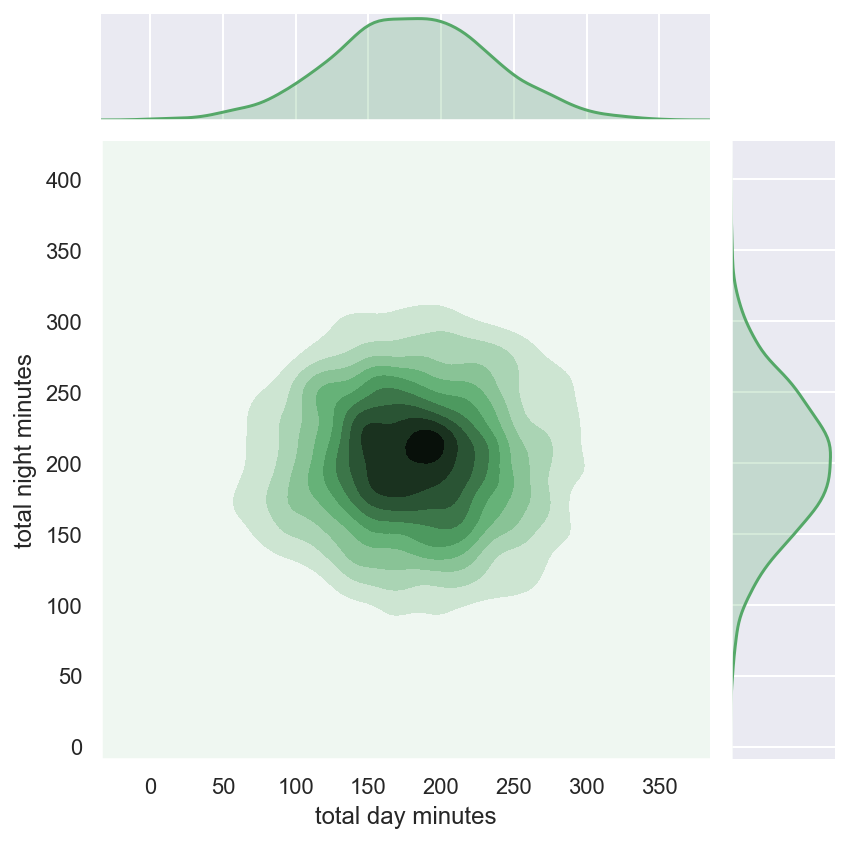

In [15]:
sns.jointplot('total day minutes', 'total night minutes', data=df,
              kind="kde", color="g");

# scatterplot matrix

Scatter plot matrix is a matrix (or grid) of scatter plots where each scatter plot in the grid is created between different combinations of variables. In other words, scatter plot matrix represents bi-variate or pairwise relationship between different combinations of variables while laying them in grid form.

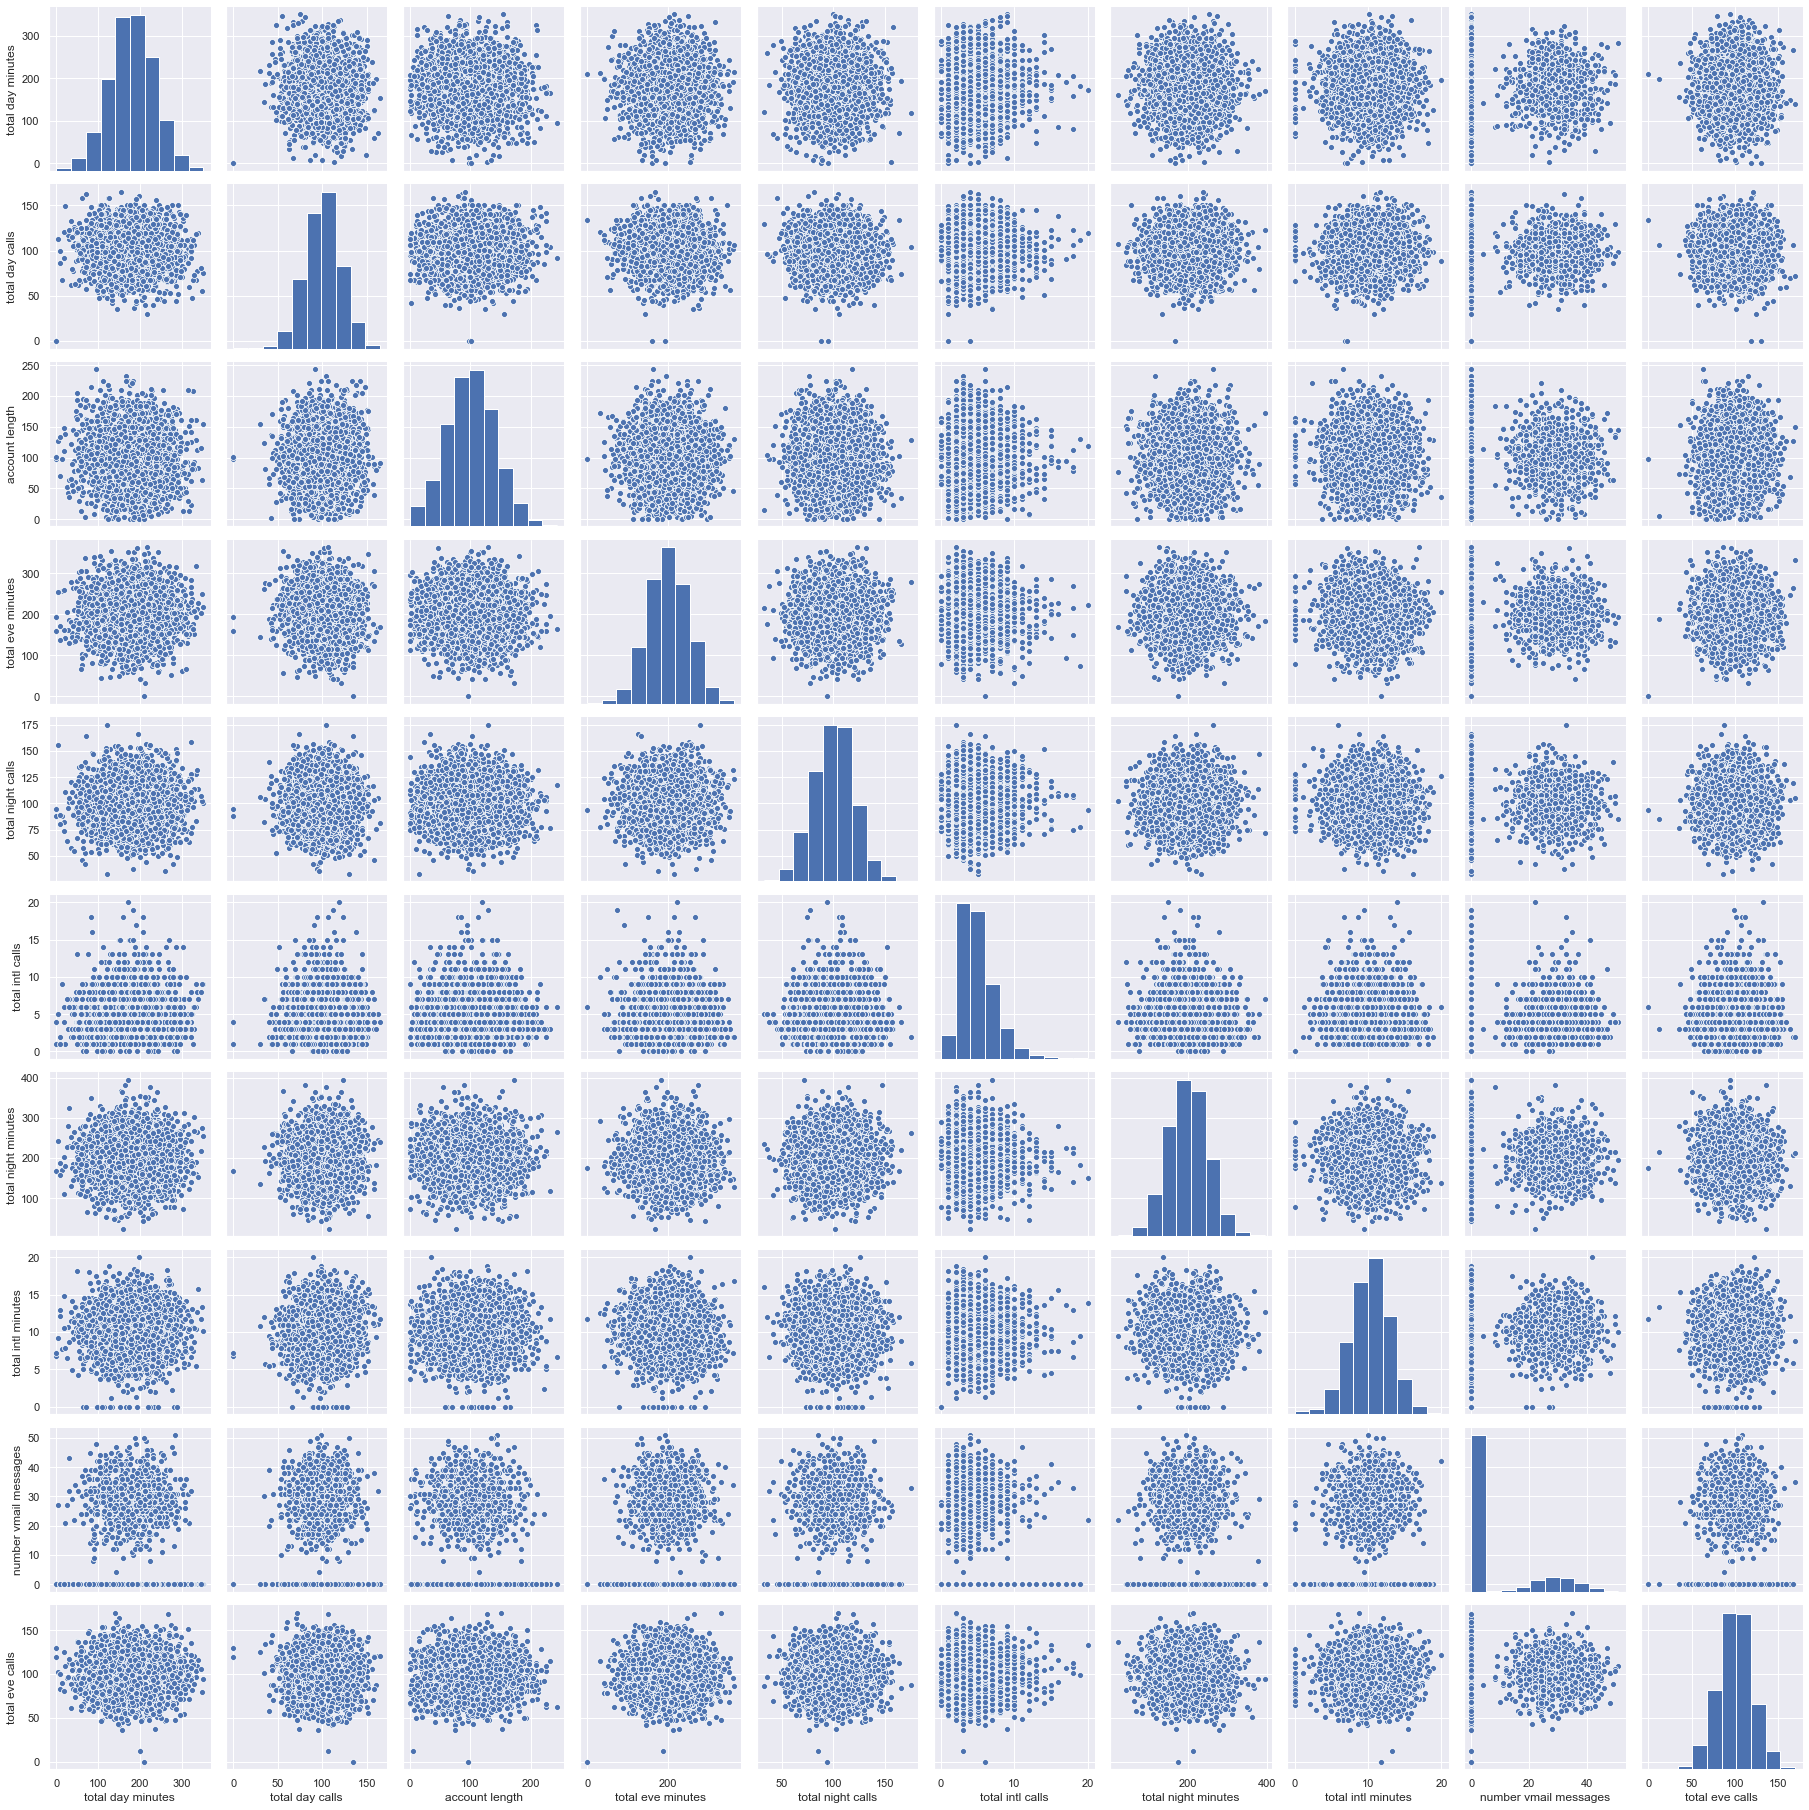

In [16]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

#### Quantitative vs. Categorical

<b>Quantitative data</b> is information about quantities; that is, information that can be measured and written down with numbers. Some other aspects to consider about quantitative data:

Focuses on numbers
Can be displayed through graphs, charts, tables, and maps
Data can be displayed over time (such as a line chart)

<b>Quantitative Data</b> Visualization Catalogue
Provides a list and examples of the many different ways to visualize data. While it is mostly quantitative, there are a couple examples of qualitative data visualization.

## categorical 

A <b>categorical variable</b> (sometimes called a <b>nominal variable</b>) is one that has two or more categories, but there is no intrinsic ordering to the categories. For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories. Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest. A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the variables. If the variable has a clear ordering, then that variable would be an ordinal variable.
There are a few main plot types for this:
- barplot
- countplot
- boxplot
- violinplot
- striplot
- swarmplot


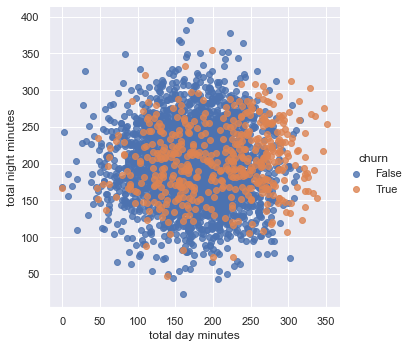

In [17]:
sns.lmplot('total day minutes', 'total night minutes', data=df, hue='churn', fit_reg=False);

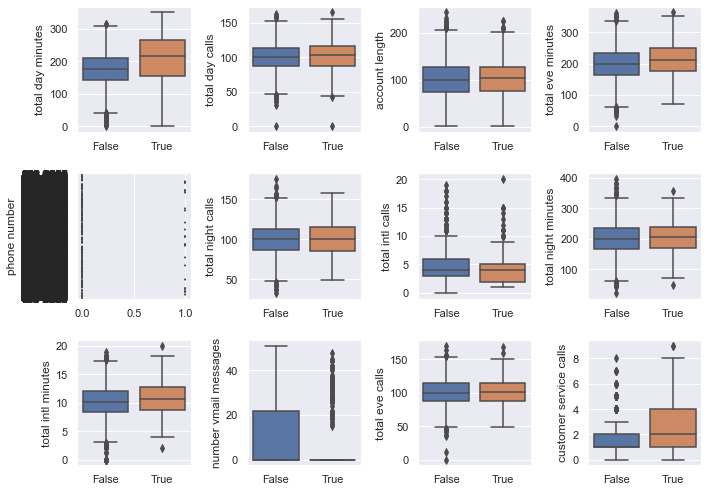

In [18]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

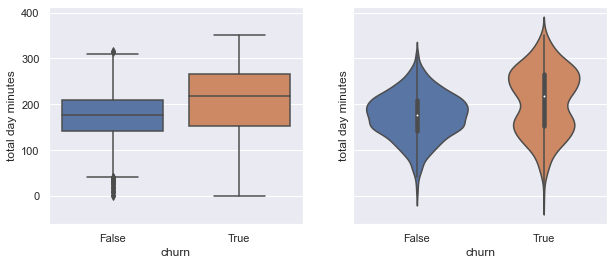

In [19]:
# violin and box plot
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1]);

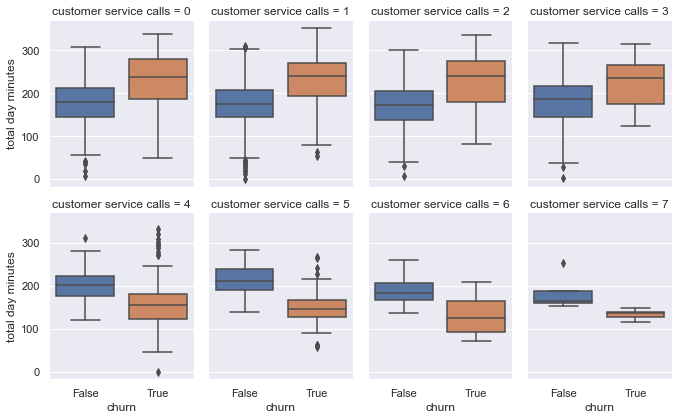

In [20]:
sns.catplot(x='churn', y='total day minutes', col='customer service calls',
               data=df[df['customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

#### Categorical vs. Categorical

#### countplot
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

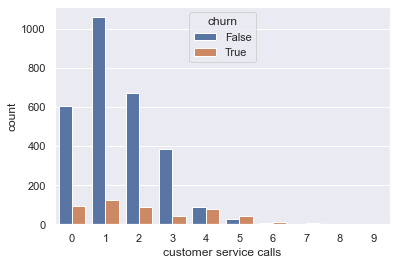

In [21]:
sns.countplot(x='customer service calls', hue='churn', data=df);

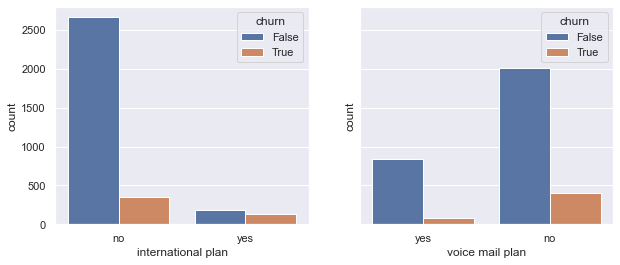

In [22]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);

#### contigency table
Contingency Table is one of the techniques for exploring two or even more variables. It is basically a tally of counts between two or more categorical variables.

In [23]:
pd.crosstab(df['state'], df['churn']).T

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [24]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


## Whole dataset visualizations

###### naive approach

Naive Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks.

Types of Naïve Bayes Classifier:
 
- Multinomial Naïve Bayes: Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification.
- Bernoulli Naïve Bayes: In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence(i.e. a word occurs in a document or not) features are used rather than term frequencies(i.e. frequency of a word in the document).
- Gaussian Naïve Bayes: In Gaussian Naïve Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution(Normal distribution).

##### dimensionality reduction

<b>Dimensionality reduction</b>, or <b>dimension reduction</b>, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable. Dimensionality reduction is common in fields that deal with large numbers of observations and/or large numbers of variables, such as signal processing, speech recognition, neuroinformatics, and bioinformatics.

#### t-SNE is a machine learning technique for dimensionality reduction that helps you to identify relevant patterns.  

The main advantage of t-SNE is the ability to preserve local structure. This means, roughly, that points which are close to one another in the high-dimensional data set will tend to be close to one another in the chart. t-SNE also produces beautiful looking visualizations.

In [25]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

binary features into numerical values using pandas.Series.map().
The map() function is used to map values of Series according to input correspondence.
It Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.

### Parameters

- arg: function, dict, or Series.It refers to the mapping correspondence.
- na_action: {None, 'ignore'}, Default value None. If ignore, it returns null values, without passing it to the mapping correspondence.

In [26]:
X = df.drop(['churn', 'state'], axis=1)
X['international plan'] = X['international plan'].map({'Yes': 1, 'No': 0})
X['voice mail plan'] = X['voice mail plan'].map({'Yes': 1, 'No': 0})

## t-distributed

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It is extensively applied in image processing, NLP, genomic data and speech processing.

- The algorithms starts by calculating the probability of similarity of points in high-dimensional space and calculating the probability of similarity of points in the corresponding low-dimensional space.

- It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in lower-dimensional space.

- To measure the minimization of the sum of difference of conditional probability t-SNE minimizes the sum of Kullback-Leibler divergence of overall data points using a gradient descent method.